Época 0: Error = 0.7508, Precisión = 0.5000


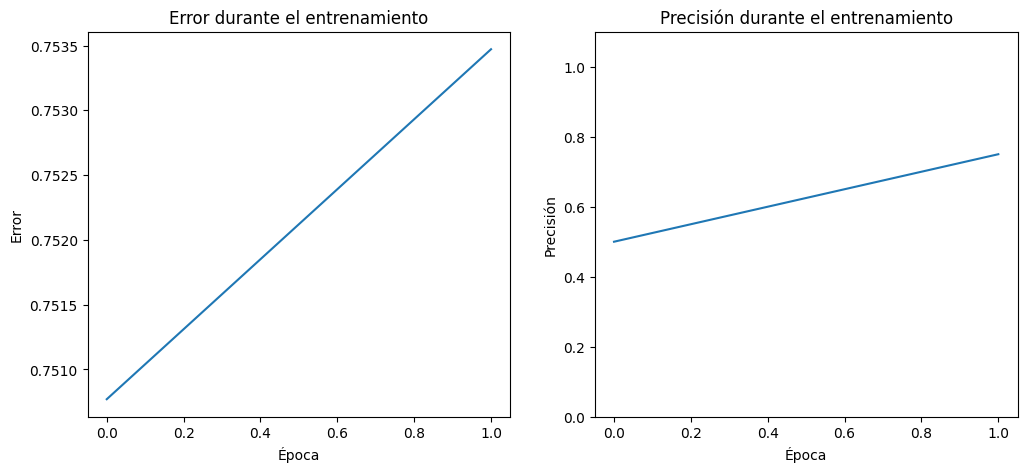


Matriz de Confusión:
       Pred 0  Pred 1
Real 0  2      0
Real 1  1      1

Métricas de rendimiento:
Precisión final: 0.7500
Precisión (positive predictive value): 1.0000
Recall (sensibilidad): 0.5000
F1-score: 0.6667

Predicciones finales:
Entrada: [0 0 1 1], Real: 0, Predicho: 0, Probabilidad: 0.1929
Entrada: [0 1 0 1], Real: 0, Predicho: 0, Probabilidad: 0.4192
Entrada: [1 0 1 0], Real: 1, Predicho: 0, Probabilidad: 0.4611
Entrada: [1 1 1 1], Real: 1, Predicho: 1, Probabilidad: 0.5052


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrada [x1, x2, x3, x4]
individuo = np.array([
    [0, 0, 1, 1],
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [1, 1, 1, 1]
])

# Clases: 0 (Rechazado), 1 (Aprobado)
clases = np.array([0, 0, 1, 1])

# Función de activación ReLU (mejor para problemas lineales)
def relu(x):
    return np.maximum(0, x)

# Función sigmoide (para la capa de salida)
def sigmoide(x):
    return 1 / (1 + np.exp(-x))

# Inicialización Xavier/Glorot para los pesos
def inicializar_pesos(n_entrada, n_salida):
    return np.random.randn(n_entrada, n_salida) * np.sqrt(2. / n_entrada)

# Arquitectura de la red
n_entradas = 4  # x1, x2, x3, x4
n_ocultas = 4    # Neuronas en capa oculta
n_salidas = 1    # Salida binaria

# Inicialización de pesos
W1 = inicializar_pesos(n_entradas, n_ocultas)
b1 = np.zeros((1, n_ocultas))
W2 = inicializar_pesos(n_ocultas, n_salidas)
b2 = np.zeros((1, n_salidas))

# Hiperparámetros
tasa_aprendizaje = 0.1
epocas = 2
tolerancia_error = 0.001

# Historial para gráficas
errores = []
precisiones = []

# Entrenamiento
for epoca in range(epocas):
    error_epoca = 0
    aciertos = 0
    
    # Forward pass
    z1 = np.dot(individuo, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    y_pred = sigmoide(z2)
    
    # Cálculo de error (entropía cruzada binaria)
    error = -np.mean(clases * np.log(y_pred + 1e-9) + (1 - clases) * np.log(1 - y_pred + 1e-9))
    error_epoca = error
    
    # Cálculo de precisión
    predicciones = (y_pred > 0.5).astype(int).flatten()
    precision = np.mean(predicciones == clases)
    
    # Backward pass
    # Capa de salida
    dz2 = y_pred - clases.reshape(-1, 1)
    dW2 = np.dot(a1.T, dz2) / len(individuo)
    db2 = np.sum(dz2, axis=0, keepdims=True) / len(individuo)
    
    # Capa oculta
    dz1 = np.dot(dz2, W2.T) * (z1 > 0)  # Derivada de ReLU
    dW1 = np.dot(individuo.T, dz1) / len(individuo)
    db1 = np.sum(dz1, axis=0, keepdims=True) / len(individuo)
    
    # Actualización de pesos
    W1 -= tasa_aprendizaje * dW1
    b1 -= tasa_aprendizaje * db1
    W2 -= tasa_aprendizaje * dW2
    b2 -= tasa_aprendizaje * db2
    
    # Guardar métricas
    errores.append(error_epoca)
    precisiones.append(precision)
    
    # Criterio de parada temprana
    if error_epoca < tolerancia_error:
        print(f"Entrenamiento completado en {epoca} épocas (error < {tolerancia_error})")
        break

    if epoca % 100 == 0:
        print(f"Época {epoca}: Error = {error_epoca:.4f}, Precisión = {precision:.4f}")

# Gráficas de entrenamiento
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(errores)
plt.title('Error durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Error')

plt.subplot(1, 2, 2)
plt.plot(precisiones)
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.ylim(0, 1.1)
plt.show()

# Evaluación final
z1 = np.dot(individuo, W1) + b1
a1 = relu(z1)
z2 = np.dot(a1, W2) + b2
y_pred_final = sigmoide(z2)
predicciones_finales = (y_pred_final > 0.5).astype(int).flatten()

# Matriz de confusión
def matriz_confusion(y_real, y_pred):
    tp = np.sum((y_pred == 1) & (y_real == 1))
    tn = np.sum((y_pred == 0) & (y_real == 0))
    fp = np.sum((y_pred == 1) & (y_real == 0))
    fn = np.sum((y_pred == 0) & (y_real == 1))
    return np.array([[tn, fp], [fn, tp]])

conf_matrix = matriz_confusion(clases, predicciones_finales)
print("\nMatriz de Confusión:")
print("       Pred 0  Pred 1")
print(f"Real 0  {conf_matrix[0,0]}      {conf_matrix[0,1]}")
print(f"Real 1  {conf_matrix[1,0]}      {conf_matrix[1,1]}")

# Métricas de rendimiento
precision = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[0,1]) if (conf_matrix[1,1] + conf_matrix[0,1]) > 0 else 0
recall = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[1,0]) if (conf_matrix[1,1] + conf_matrix[1,0]) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("\nMétricas de rendimiento:")
print(f"Precisión final: {np.mean(predicciones_finales == clases):.4f}")
print(f"Precisión (positive predictive value): {precision:.4f}")
print(f"Recall (sensibilidad): {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Visualización de las predicciones
print("\nPredicciones finales:")
for i in range(len(individuo)):
    print(f"Entrada: {individuo[i]}, Real: {clases[i]}, Predicho: {predicciones_finales[i]}, Probabilidad: {y_pred_final[i][0]:.4f}")

In [16]:
# Generar nuevos datos aleatorios de prueba (10 ejemplos)
np.random.seed(42)  # Para reproducibilidad
nuevos_datos = np.random.randint(0, 2, size=(10, 4))  # Valores binarios como los datos originales

# Función para predecir clases
def predecir(datos):
    z1 = np.dot(datos, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    y_pred = sigmoide(z2)
    return (y_pred > 0.5).astype(int).flatten(), y_pred

# Predecir clases para nuevos datos
clases_predichas, probabilidades = predecir(nuevos_datos)

# Mostrar resultados
print("\nPredicciones para nuevos datos aleatorios:")
print("Datos\t\tClase Predicha\tProbabilidad")
print("----------------------------------------")
for i in range(len(nuevos_datos)):
    print(f"{nuevos_datos[i]}\t{clases_predichas[i]}\t\t{probabilidades[i][0]:.4f}")




Predicciones para nuevos datos aleatorios:
Datos		Clase Predicha	Probabilidad
----------------------------------------
[0 1 0 0]	1		0.5063
[0 1 0 0]	1		0.5063
[0 1 0 0]	1		0.5063
[0 0 1 0]	0		0.4319
[1 1 1 0]	0		0.4906
[1 0 1 1]	0		0.3611
[1 1 1 1]	1		0.5052
[1 1 0 0]	0		0.4995
[1 1 1 0]	0		0.4906
[1 0 0 0]	0		0.4718
